In [ ]:
!pip install matplotlib
!pip install opencv-python
!pip install numpy

In [ ]:
import urllib

#URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
    'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
    'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
    'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
    'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
    'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
    'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
    'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz']

for idx, link in enumerate(links):
    fn = 'nih_data_all/images_%02d.tar.gz' % (idx+1)
    print('downloading', fn, '...')
    urllib.request.urlretrieve(link, fn)  # download the zip file
print("Download complete. Please check the checksums")

downloading nih_data_all/images_01.tar.gz ...
downloading nih_data_all/images_02.tar.gz ...
downloading nih_data_all/images_03.tar.gz ...
downloading nih_data_all/images_04.tar.gz ...
downloading nih_data_all/images_05.tar.gz ...
downloading nih_data_all/images_06.tar.gz ...
downloading nih_data_all/images_07.tar.gz ...
downloading nih_data_all/images_08.tar.gz ...
downloading nih_data_all/images_09.tar.gz ...
downloading nih_data_all/images_10.tar.gz ...
downloading nih_data_all/images_11.tar.gz ...
downloading nih_data_all/images_12.tar.gz ...
Download complete. Please check the checksums


<h1> Prepare Data

In [ ]:
import os
data_dir = "nih_data_all"
images_zip = [file for file in os.listdir("nih_data_all") if file.endswith('.gz')]
images_zip = [os.path.join(data_dir , file)  for file in images_zip]
print(images_zip)

['nih_data_all/images_06.tar.gz', 'nih_data_all/images_10.tar.gz', 'nih_data_all/images_09.tar.gz', 'nih_data_all/images_05.tar.gz', 'nih_data_all/images_01.tar.gz', 'nih_data_all/images_03.tar.gz', 'nih_data_all/images_08.tar.gz', 'nih_data_all/images_11.tar.gz', 'nih_data_all/images_12.tar.gz', 'nih_data_all/images_07.tar.gz', 'nih_data_all/images_04.tar.gz', 'nih_data_all/images_02.tar.gz']


In [ ]:
import shutil
def extract_all(archives, extract_path):
    for filename in archives:
        shutil.unpack_archive(filename, extract_path)
        os.remove(filename)
extract_all(images_zip[0:2], data_dir+"/")

In [ ]:
import pandas as pd
df =labelDf=pd.read_csv('/content/all_nih_data_Entry_2017.csv').drop(labels=['OriginalImagePixelSpacing[x','y]','Unnamed: 11'], axis=1)
gp_images = df.groupby("Image Index")
gp_images.head()

Image Index          Finding Labels  ...  OriginalImage[Width  Height]
0       00000001_000.png            Cardiomegaly  ...                 2682     2749
1       00000001_001.png  Cardiomegaly|Emphysema  ...                 2894     2729
2       00000001_002.png   Cardiomegaly|Effusion  ...                 2500     2048
3       00000002_000.png              No Finding  ...                 2500     2048
4       00000003_000.png                  Hernia  ...                 2582     2991
...                  ...                     ...  ...                  ...      ...
112115  00030801_001.png          Mass|Pneumonia  ...                 2048     2500
112116  00030802_000.png              No Finding  ...                 2048     2500
112117  00030803_000.png              No Finding  ...                 2048     2500
112118  00030804_000.png              No Finding  ...                 2048     2500
112119  00030805_000.png              No Finding  ...                 2048     2500

[112120 rows x 9 columns]

In [ ]:
extracted = os.listdir("/content/nih_data_all/images")
all_pneumonia = df[df['Finding Labels']=="Pneumonia"]['Image Index']
print(extracted)

['00022726_020.png', '00021314_000.png', '00022155_022.png', '00012298_012.png', '00021782_003.png', '00013652_000.png', '00024623_000.png', '00013037_001.png', '00011683_040.png', '00021321_021.png', '00013122_005.png', '00022178_001.png', '00012218_002.png', '00011961_000.png', '00023156_014.png', '00013213_002.png', '00012374_000.png', '00012045_050.png', '00012874_005.png', '00012668_000.png', '00023112_000.png', '00012028_007.png', '00012061_002.png', '00022833_000.png', '00021644_000.png', '00021679_000.png', '00022543_002.png', '00013055_007.png', '00012899_000.png', '00020963_000.png', '00022702_002.png', '00012045_055.png', '00013111_003.png', '00013034_000.png', '00012615_006.png', '00013042_000.png', '00020975_000.png', '00013272_003.png', '00013386_006.png', '00011987_009.png', '00021303_001.png', '00013514_000.png', '00011583_012.png', '00021780_000.png', '00013594_050.png', '00013036_015.png', '00011764_004.png', '00013333_000.png', '00012144_010.png', '00021972_002.png',

<h1> Viewing 1 sample

In [ ]:
 im1 = extracted[0]
 res = df.loc[df["Image Index"]==im1]['Finding Labels'].values[0]
 print(res, "|" not in res)

Nodule|Pneumothorax False


In [ ]:
from collections import defaultdict
img_dict = defaultdict(list)
for im in extracted:
  label = df[df["Image Index"]==im]["Finding Labels"].values[0]
  if  "|" not in label:
    img_dict[str(label)].append(im)



<h1> View Infiltration /Atelectasis... xrays

In [ ]:
images = img_dict['Infiltration']

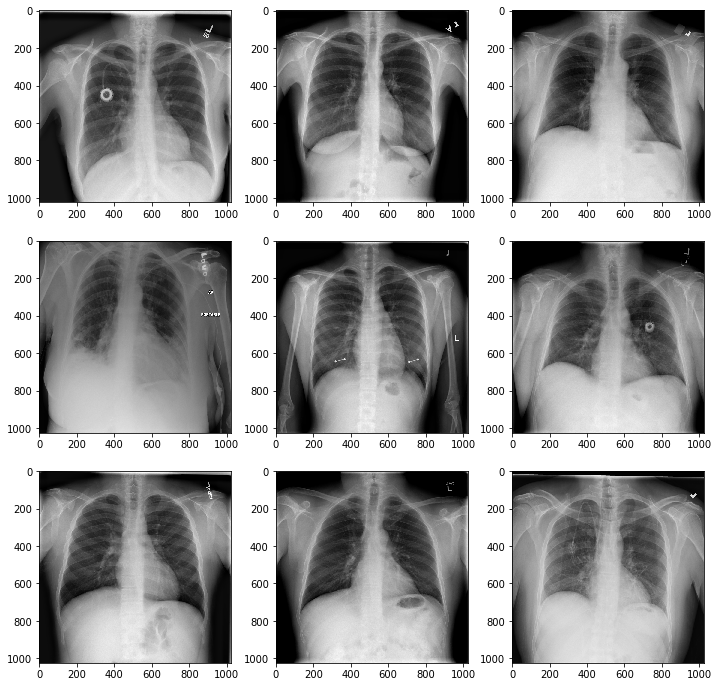

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
root = "/content/nih_data_all/images/"

fig=plt.figure(figsize=(12, 12))
for i in range(1, 10):
    img =cv2.imread( root+images[i]) #note maybe not all is grayscale !!!!
    fig.add_subplot(3,3,i)
    plt.imshow(img)
plt.show()

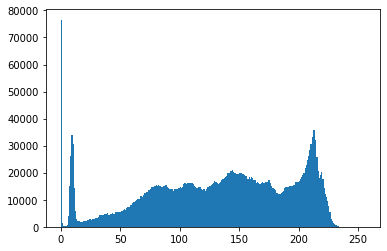

In [ ]:
#histogram plot of pixel values
plt.hist(img.ravel(),256,[0,256]); plt.show() 



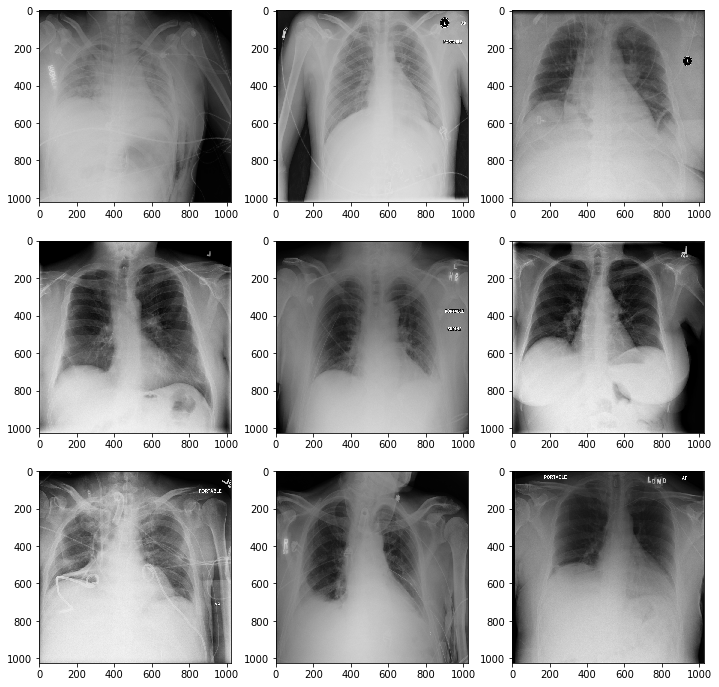

In [ ]:
images = img_dict['Atelectasis']
fig=plt.figure(figsize=(12, 12))
for i in range(1, 10):
    img =cv2.imread( root+images[i]) #note maybe not all is grayscale !!!!
    fig.add_subplot(3,3,i)
    plt.imshow(img)
plt.show()

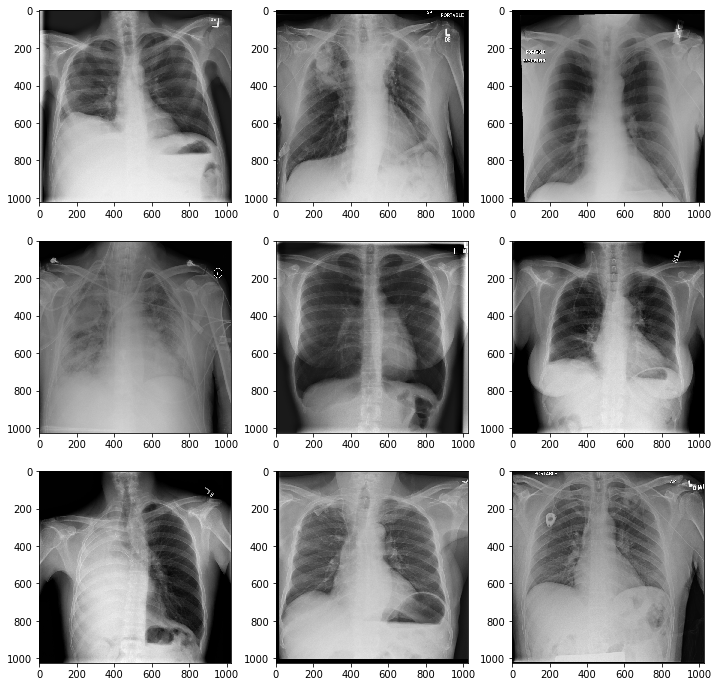

In [ ]:
images = img_dict['Mass']
fig=plt.figure(figsize=(12, 12))
for i in range(1, 10):
    img =cv2.imread( root+images[i]) #note maybe not all is grayscale !!!!
    fig.add_subplot(3,3,i)
    plt.imshow(img)
plt.show()

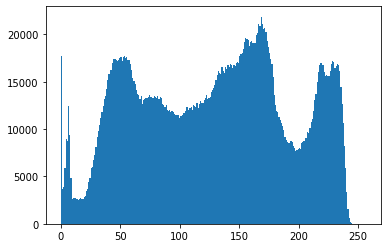

In [ ]:
plt.hist(img.ravel(),256,[0,256]); plt.show() # need to scale it to same scale as another label

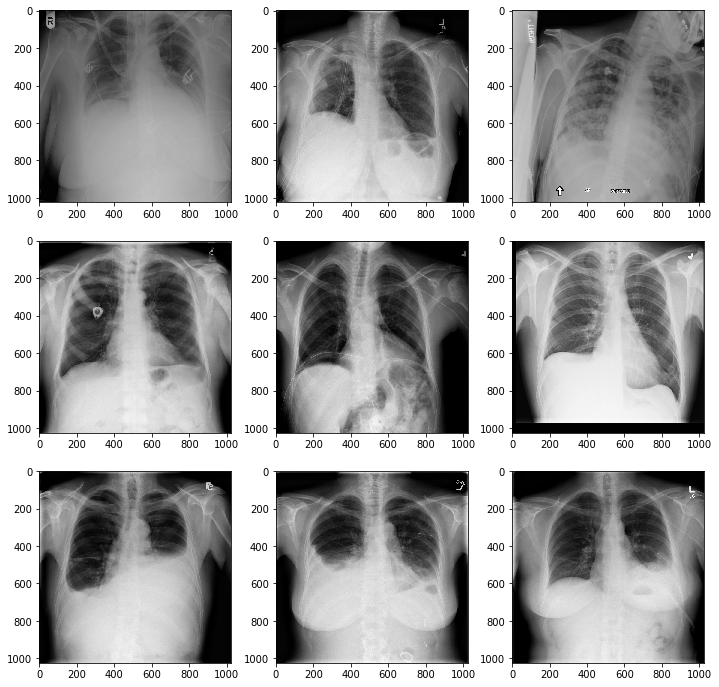

In [ ]:
images = img_dict['Effusion']
fig=plt.figure(figsize=(12, 12))
for i in range(1, 10):
    img =cv2.imread( root+images[i]) #note maybe not all is grayscale !!!!
    fig.add_subplot(3,3,i)
    plt.imshow(img)
plt.show()

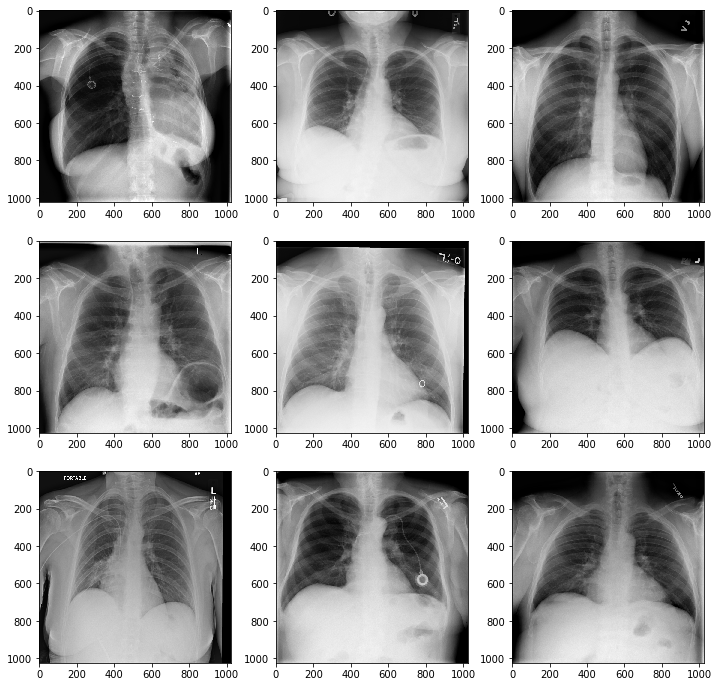

In [ ]:
images = img_dict['No Finding']
fig=plt.figure(figsize=(12, 12))
for i in range(1, 10):
    img =cv2.imread( root+images[i]) #note maybe not all is grayscale !!!!
    fig.add_subplot(3,3,i)
    plt.imshow(img)
plt.show()

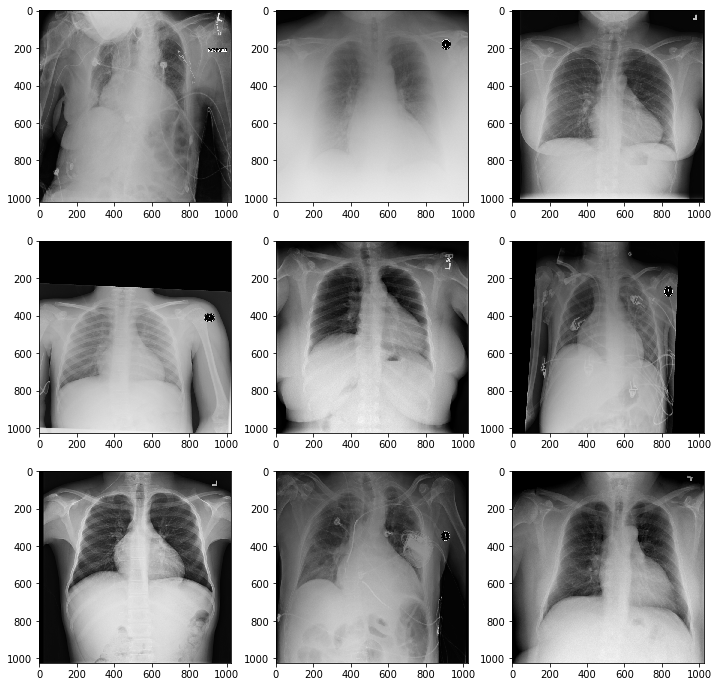

In [ ]:

images = img_dict['Cardiomegaly']
fig=plt.figure(figsize=(12, 12))
for i in range(1, 10):
    img =cv2.imread( root+images[i]) #note maybe not all is grayscale !!!!
    fig.add_subplot(3,3,i)
    plt.imshow(img)
plt.show()

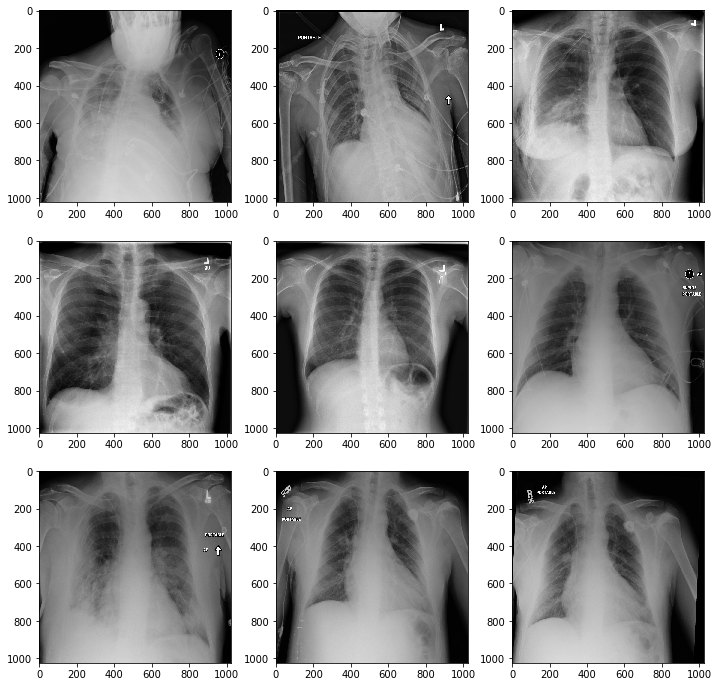

In [ ]:
images = img_dict['Consolidation']
fig=plt.figure(figsize=(12, 12))
for i in range(1, 10):
    img =cv2.imread( root+images[i]) #note maybe not all is grayscale !!!!
    fig.add_subplot(3,3,i)
    plt.imshow(img)
plt.show()

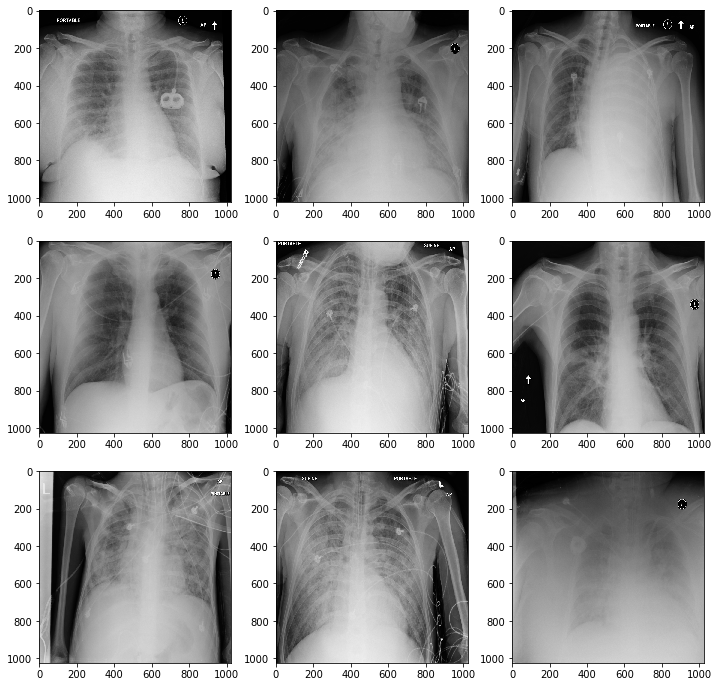

In [ ]:
images = img_dict['Edema']
fig=plt.figure(figsize=(12, 12))
for i in range(1, 10):
    img =cv2.imread( root+images[i]) #note maybe not all is grayscale !!!!
    fig.add_subplot(3,3,i)
    plt.imshow(img)
plt.show()

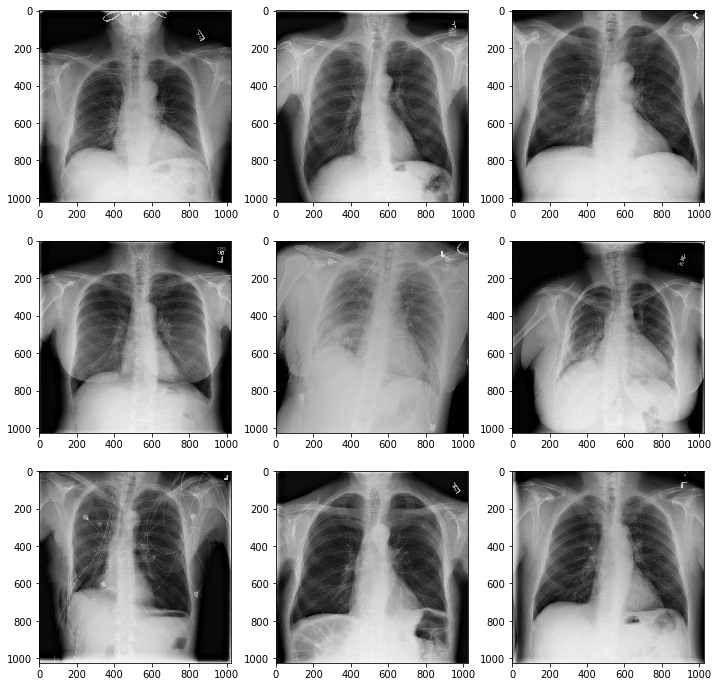

In [ ]:
images = img_dict['Emphysema']
fig=plt.figure(figsize=(12, 12))
for i in range(1, 10):
    img =cv2.imread( root+images[i]) #note maybe not all is grayscale !!!!
    fig.add_subplot(3,3,i)
    plt.imshow(img)
plt.show()

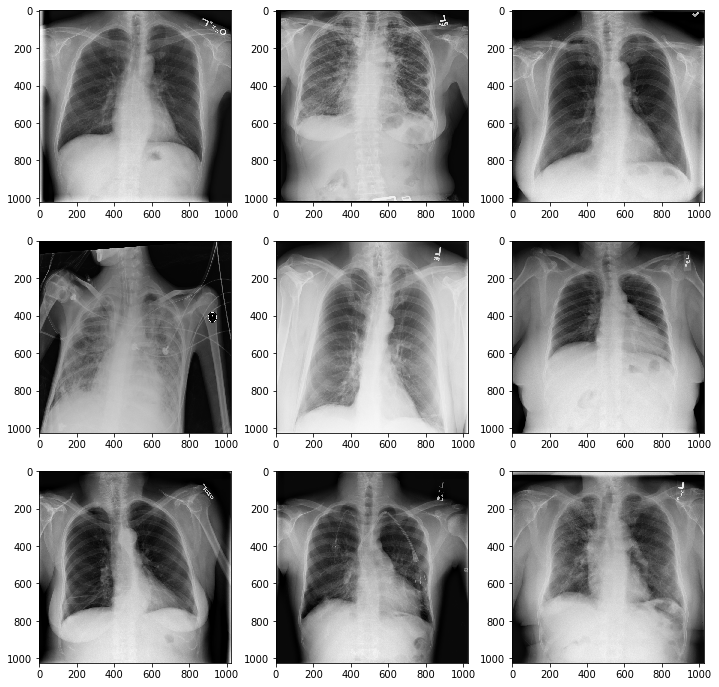

In [ ]:
images = img_dict['Fibrosis']
fig=plt.figure(figsize=(12, 12))
for i in range(1, 10):
    img =cv2.imread( root+images[i]) #note maybe not all is grayscale !!!!
    fig.add_subplot(3,3,i)
    plt.imshow(img)
plt.show()

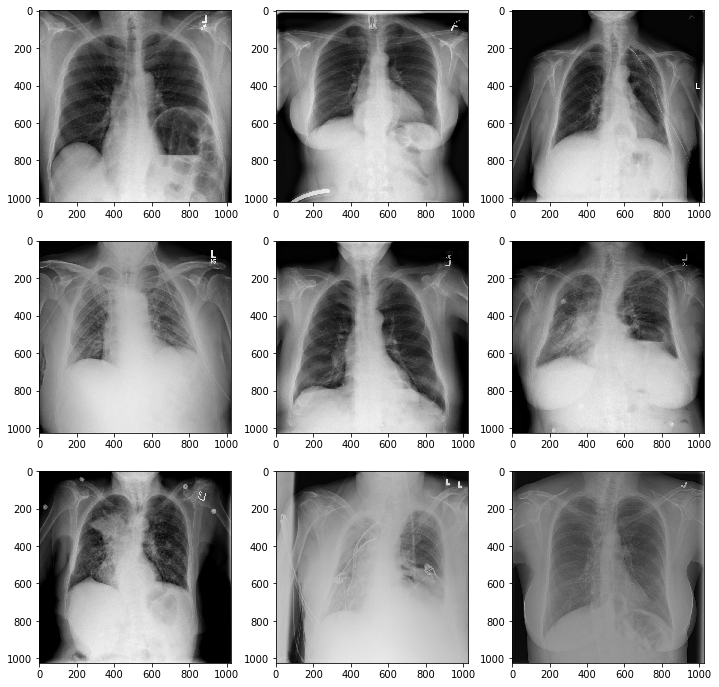

In [ ]:
images = img_dict['Hernia']
fig=plt.figure(figsize=(12, 12))
for i in range(1, 10):
    img =cv2.imread( root+images[i]) #note maybe not all is grayscale !!!!
    fig.add_subplot(3,3,i)
    plt.imshow(img)
plt.show()

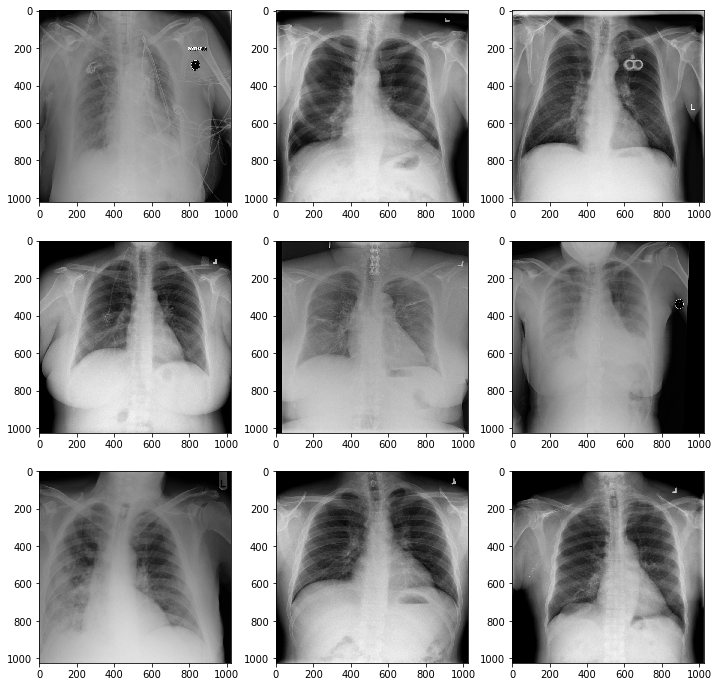

In [ ]:
images = img_dict['Pneumonia']
fig=plt.figure(figsize=(12, 12))
for i in range(1, 10):
    img =cv2.imread( root+images[i]) #note maybe not all is grayscale !!!!
    fig.add_subplot(3,3,i)
    plt.imshow(img)
plt.show()

In [ ]:
def plot_disease(name):
  images = img_dict[name]
  fig=plt.figure(figsize=(12, 12))
  for i in range(1, 10):
    img =cv2.imread( root+images[i]) #note maybe not all is grayscale !!!!
    fig.add_subplot(3,3,i)
    plt.imshow(img)
  fig.suptitle(name, fontsize=16)
  plt.show()

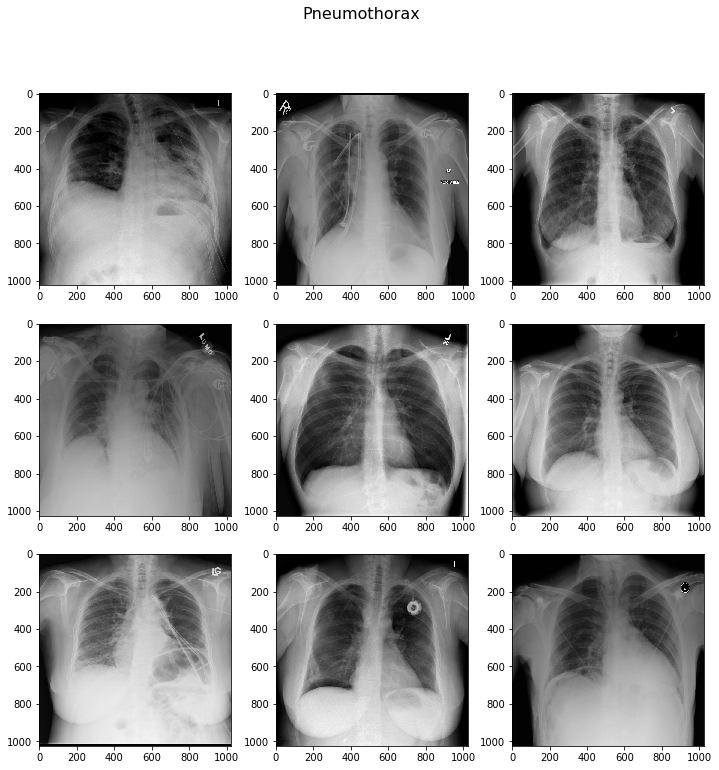

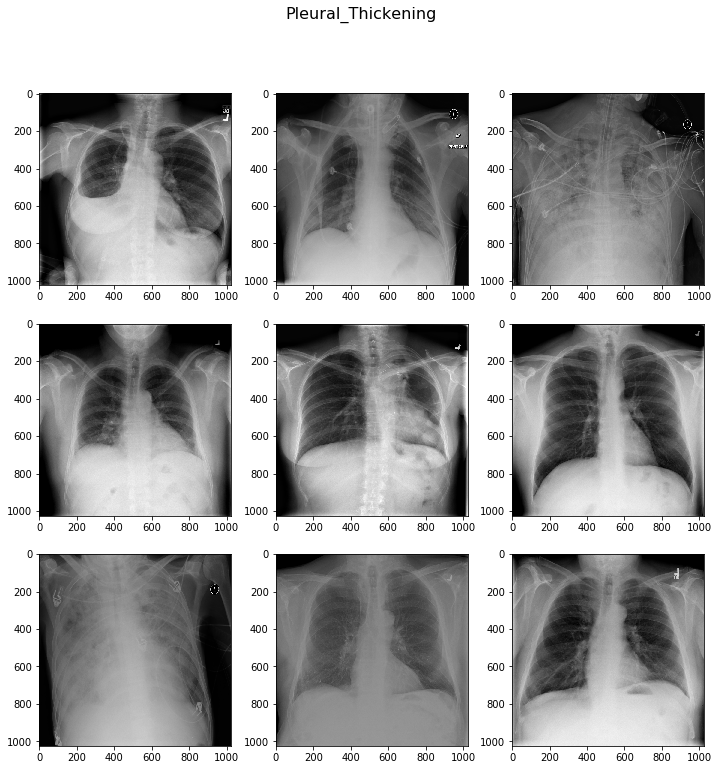

In [ ]:
plot_disease('Pneumothorax')
plot_disease('Pleural_Thickening')

In [ ]:
print(len(img_dict.keys()), img_dict.keys())

15 dict_keys(['Infiltration', 'Mass', 'No Finding', 'Atelectasis', 'Nodule', 'Consolidation', 'Cardiomegaly', 'Effusion', 'Edema', 'Pneumothorax', 'Pleural_Thickening', 'Emphysema', 'Fibrosis', 'Hernia', 'Pneumonia'])
